/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
2.5.1+cu124
Epoch : 1

Average Val Loss: 0.2959, Val Accuracy: 5958/6300 (94.571%)

Epoch : 2

Average Val Loss: 0.1044, Val Accuracy: 6149/6300 (97.603%)

Epoch : 3

Average Val Loss: 0.0456, Val Accuracy: 6224/6300 (98.794%)

Epoch : 4

Average Val Loss: 0.0439, Val Accuracy: 6220/6300 (98.730%)

Epoch : 5

Average Val Loss: 0.0362, Val Accuracy: 6229/6300 (98.873%)

Epoch : 6

Average Val Loss: 0.0309, Val Accuracy: 6249/6300 (99.190%)

Epoch : 7

Average Val Loss: 0.0338, Val Accuracy: 6237/6300 (99.000%)

Epoch : 8

Average Val Loss: 0.0256, Val Accuracy: 6258/6300 (99.333%)

Epoch : 9

Average Val Loss: 0.0306, Val Accuracy: 6240/6300 (99.048%)

Epoch : 10

Average Val Loss: 0.0308, Val Accuracy: 6247/6300 (99.159%)

Epoch : 11

Average Val Loss: 0.0274, Val Accuracy: 6252/6300 (99.238%)

Epoch : 12

Average Val Loss: 0.0265, Val Accuracy: 6252/630

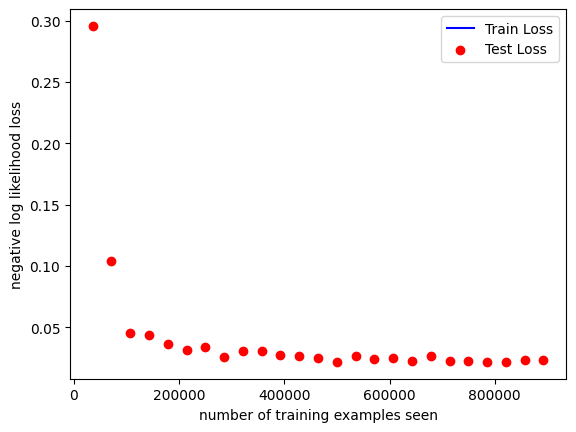

In [1]:
# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:41.745422Z","iopub.execute_input":"2025-03-20T04:13:41.745677Z","iopub.status.idle":"2025-03-20T04:13:42.658325Z","shell.execute_reply.started":"2025-03-20T04:13:41.745647Z","shell.execute_reply":"2025-03-20T04:13:42.657440Z"}}
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# %% [markdown]
# # Initial Imports

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:42.659578Z","iopub.execute_input":"2025-03-20T04:13:42.659955Z","iopub.status.idle":"2025-03-20T04:13:42.664200Z","shell.execute_reply.started":"2025-03-20T04:13:42.659932Z","shell.execute_reply":"2025-03-20T04:13:42.663246Z"}}
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:42.666007Z","iopub.execute_input":"2025-03-20T04:13:42.666295Z","iopub.status.idle":"2025-03-20T04:13:43.864565Z","shell.execute_reply.started":"2025-03-20T04:13:42.666267Z","shell.execute_reply":"2025-03-20T04:13:43.863636Z"}}
# for imaage and data split
from PIL import Image
from sklearn.model_selection import train_test_split

import math
import copy
import time

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:43.867584Z","iopub.execute_input":"2025-03-20T04:13:43.868029Z","iopub.status.idle":"2025-03-20T04:13:49.914817Z","shell.execute_reply.started":"2025-03-20T04:13:43.868003Z","shell.execute_reply":"2025-03-20T04:13:49.914092Z"}}
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from torch.utils.data import DataLoader, TensorDataset
from torchvision.utils import make_grid

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:49.915552Z","iopub.execute_input":"2025-03-20T04:13:49.915925Z","iopub.status.idle":"2025-03-20T04:13:49.919777Z","shell.execute_reply.started":"2025-03-20T04:13:49.915903Z","shell.execute_reply":"2025-03-20T04:13:49.918955Z"}}
#neural net imports
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

# %% [markdown]
# ## pytorch Version

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:49.920730Z","iopub.execute_input":"2025-03-20T04:13:49.920946Z","iopub.status.idle":"2025-03-20T04:13:49.938995Z","shell.execute_reply.started":"2025-03-20T04:13:49.920928Z","shell.execute_reply":"2025-03-20T04:13:49.938168Z"}}
%matplotlib inline
print(torch.__version__)

# %% [markdown]
# # Load Dataset

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:49.939661Z","iopub.execute_input":"2025-03-20T04:13:49.939912Z","iopub.status.idle":"2025-03-20T04:13:54.649265Z","shell.execute_reply.started":"2025-03-20T04:13:49.939892Z","shell.execute_reply":"2025-03-20T04:13:54.648253Z"}}
# # Load the data
# train_df = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_train.csv")
# test_df = pd.read_csv("/kaggle/input/mnist-in-csv/mnist_test.csv")

# y = train_df["label"]
# x = train_df.drop("label", axis = 1)

# %% [code]
# Load the data
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

y = train_df["label"]
x = train_df.drop("label", axis = 1)

# %% [markdown]
# ## Check Dataset head

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:54.651661Z","iopub.execute_input":"2025-03-20T04:13:54.651925Z","iopub.status.idle":"2025-03-20T04:13:54.677056Z","shell.execute_reply.started":"2025-03-20T04:13:54.651906Z","shell.execute_reply":"2025-03-20T04:13:54.676370Z"}}
train_df.head()

# %% [markdown]
# # Split - Train Val Test

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:54.678112Z","iopub.execute_input":"2025-03-20T04:13:54.678368Z","iopub.status.idle":"2025-03-20T04:13:54.970597Z","shell.execute_reply.started":"2025-03-20T04:13:54.678349Z","shell.execute_reply":"2025-03-20T04:13:54.969684Z"}}
#Split training data into Train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.15, shuffle=True)

# %% [markdown]
# # Hyperparameters

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:54.971553Z","iopub.execute_input":"2025-03-20T04:13:54.971896Z","iopub.status.idle":"2025-03-20T04:13:54.980508Z","shell.execute_reply.started":"2025-03-20T04:13:54.971873Z","shell.execute_reply":"2025-03-20T04:13:54.979770Z"}}
# Hyperparameters
random_seed = 42
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

num_epoch = 25
batch_size_train = 1024
batch_size_test = 1024
learning_rate = 0.002
momentum = 0.9
log_interval = 100

# %% [markdown]
# # Dataset Processing

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:54.981323Z","iopub.execute_input":"2025-03-20T04:13:54.981618Z","iopub.status.idle":"2025-03-20T04:13:54.988782Z","shell.execute_reply.started":"2025-03-20T04:13:54.981586Z","shell.execute_reply":"2025-03-20T04:13:54.987964Z"}}
#CustomDatasetFromDF
class MNISTDataset(Dataset):
    def __init__(self,  data, target, train=True, transform=None):
        """
        Args:
            csv_path (string): path to csv file
            transform: pytorch transforms for transforms and tensor conversion
        """
        self.train = train
        if self.train :
            self.data = data
            self.labels = np.asarray(target.iloc[:])
        else:
            self.data = data
            self.labels = None
        self.height = 28 # Height of image
        self.width = 28 # Width of image
        self.transform = transform

    def __getitem__(self, index):
        # Read each 784 pixels and reshape the 1D array ([784]) to 2D array ([28,28])
        img_as_np = np.asarray(self.data.iloc[index][0:]).reshape(self.height, self.width).astype('uint8')
        # Convert image from numpy array to PIL image, mode 'L' is for grayscale
        img_as_img = Image.fromarray(img_as_np)
        img_as_img = img_as_img.convert('L')
        img_as_tensor = img_as_img
        
        if self.train:
            single_image_label = self.labels[index]
        else:
            single_image_label = None
            
        # Transform image to tensor
        if self.transform is not None:
            img_as_tensor = self.transform(img_as_img)
        
        if self.train:
        # Return image and the label                
            return (img_as_tensor, single_image_label)
        else:
            return img_as_tensor
    
    def __len__(self):
        return len(self.data.index)

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:54.989568Z","iopub.execute_input":"2025-03-20T04:13:54.989813Z","iopub.status.idle":"2025-03-20T04:13:55.000532Z","shell.execute_reply.started":"2025-03-20T04:13:54.989793Z","shell.execute_reply":"2025-03-20T04:13:54.999818Z"}}
def calculate_img_stats_full(dataset):
    imgs_ = torch.stack([img for img,_ in dataset],dim=1)
    imgs_ = imgs_.view(1,-1)
    imgs_mean = imgs_.mean(dim=1)
    imgs_std = imgs_.std(dim=1)
    return imgs_mean,imgs_std

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:13:55.001368Z","iopub.execute_input":"2025-03-20T04:13:55.001691Z","iopub.status.idle":"2025-03-20T04:14:12.805899Z","shell.execute_reply.started":"2025-03-20T04:13:55.001663Z","shell.execute_reply":"2025-03-20T04:14:12.804967Z"}}
transformations_org = transforms.Compose([transforms.ToTensor()])
train_org = MNISTDataset(x, y, True, transformations_org)

calculate_img_stats_full(train_org)
# (tensor([0.1310]), tensor([0.3085]))

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:14:12.806820Z","iopub.execute_input":"2025-03-20T04:14:12.807088Z","iopub.status.idle":"2025-03-20T04:14:12.812558Z","shell.execute_reply.started":"2025-03-20T04:14:12.807058Z","shell.execute_reply":"2025-03-20T04:14:12.811782Z"}}
transformations_train = transforms.Compose([transforms.RandomRotation(15),                                       
                                            transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
                                            transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.1310], std=[0.3085])
                                           ])


transformations_valid = transforms.Compose([transforms.ToTensor(),
                                            transforms.Normalize(mean=[0.1310], std=[0.3085])
                                           ])

train = MNISTDataset(X_train, y_train, True, transformations_train)
valid = MNISTDataset(X_valid, y_valid, True, transformations_valid)
test  = MNISTDataset(data=test_df, target=None, train=False, transform=transformations_valid)

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:14:12.813466Z","iopub.execute_input":"2025-03-20T04:14:12.813694Z","iopub.status.idle":"2025-03-20T04:14:12.828318Z","shell.execute_reply.started":"2025-03-20T04:14:12.813675Z","shell.execute_reply":"2025-03-20T04:14:12.827644Z"}}
train_loader = DataLoader(train, batch_size=batch_size_train,num_workers=2, shuffle=True)
valid_loader = DataLoader(valid, batch_size=batch_size_test, num_workers=2, shuffle=True)
test_loader  = DataLoader(test,  batch_size=batch_size_test, shuffle=False)

# %% [markdown]
# # Network

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:14:12.828987Z","iopub.execute_input":"2025-03-20T04:14:12.829244Z","iopub.status.idle":"2025-03-20T04:14:12.844015Z","shell.execute_reply.started":"2025-03-20T04:14:12.829225Z","shell.execute_reply":"2025-03-20T04:14:12.843173Z"}}
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv_block = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2) 
        )
        
        self.linear_block = nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Linear(128*7*7, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.conv_block(x)
        x = x.view(x.size(0), -1)
        x = self.linear_block(x)
        return x

# %% [markdown]
# # Train

# %% [code] {"execution":{"iopub.status.busy":"2025-03-20T04:14:12.844766Z","iopub.execute_input":"2025-03-20T04:14:12.844987Z","execution_failed":"2025-03-20T04:16:02.421Z"}}
cnn_model = Net()    
criterion = nn.CrossEntropyLoss()

if torch.cuda.is_available():
    cnn_model.cuda()
    criterion.cuda()                       

optimizer = optim.Adam(params=cnn_model.parameters(), lr=learning_rate)    

exp_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min')

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(1, num_epoch + 1)]    

best_model_wts = copy.deepcopy(cnn_model.state_dict())
best_acc = 0.0

since = time.time()

for epoch in range(1, num_epoch + 1):
    cnn_model.train()    
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images).cuda()
        labels = Variable(labels).cuda()
        # Clear gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = cnn_model(images)
        # Calculate loss
        loss = criterion(outputs, labels)
        # Backward pass
        loss.backward()
        # Update weights
        optimizer.step()
        if (i + 1)% log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, (i + 1) * len(images), len(train_loader.dataset),
                100. * (i + 1) / len(train_loader), loss.data))
            train_losses.append(loss.item())
            train_counter.append((i*64) + ((epoch-1)*len(train_loader.dataset)))
    cnn_model.eval()    
    loss = 0    
    running_corrects = 0
    with torch.no_grad():       
        for i, (data, target) in enumerate(valid_loader):
            data = Variable(data).cuda()
            target = Variable(target).cuda()
            output = cnn_model(data)
            loss += F.cross_entropy(output, target, reduction='sum').item()            
            _, preds = torch.max(output, 1)            
            running_corrects += torch.sum(preds == target.data)
    loss /= len(valid_loader.dataset)
    test_losses.append(loss)
    epoch_acc = 100. * running_corrects.double() / len(valid_loader.dataset)
    print("Epoch :",epoch)
    print('\nAverage Val Loss: {:.4f}, Val Accuracy: {}/{} ({:.3f}%)\n'.format(
        loss, running_corrects, len(valid_loader.dataset), epoch_acc))
    if epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(cnn_model.state_dict())
    exp_lr_scheduler.step(loss)
             
time_elapsed = time.time() - since
print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
print('Best val Acc: {:4f}'.format(best_acc))

# %% [markdown]
# ## Plot

# %% [code] {"execution":{"execution_failed":"2025-03-20T04:16:02.423Z"}}
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

# %% [markdown]
# # Test

# %% [code] {"execution":{"execution_failed":"2025-03-20T04:16:02.424Z"}}
cnn_model.eval()
test_preds = None
test_preds = torch.LongTensor()
    
for i, data in enumerate(test_loader):
    data = Variable(data).cuda()   
    output = cnn_model(data)
    preds = output.cpu().data.max(1, keepdim=True)[1]
    test_preds = torch.cat((test_preds, preds), dim=0)

# %% [markdown]
# ## Save Output as CSV

# %% [code] {"execution":{"execution_failed":"2025-03-20T04:16:02.425Z"}}
out_df = pd.DataFrame({'ImageId':np.arange(1, len(test_loader.dataset)+1), 'Label':test_preds.numpy().squeeze()})
out_df.to_csv('submission.csv', index=False)